# 0. Setups.

In [1]:
%%html
<style>
    table {
        float: left;
        margin-right: 20px; /* Optional: Adds space between table and other content */
    }
</style>

## 1. Introduction.

### 1.1. Type of Modules.
- Metric : Predictions, labels => performance.
- Comparison : Compare 2 models.
- Measurement : Dataset's properties.

### 1.2. Type of Metrics.
- Generic metrics : Precision, accuracy.
- Task-specific metrics : Machine Translation (BLEU or ROUGE) or Named Entity Recognition (seqeval).
  - https://huggingface.co/tasks
- Dataset-specific metrics : The GLUE benchmark has a dedicated evaluation metric.
  - Dataset Card.
 
| Metric                 | Description                                                |
|:-----------------------|:-----------------------------------------------------------|
| `accuracy`             | Measures the percentage of correct predictions.            |
| `bleu`                 | Calculates BLEU score for evaluating text generation tasks. |
| `rouge`                | Measures overlap of n-grams between generated and reference text. |
| `f1`                   | Computes the F1 score, the harmonic mean of precision and recall. |
| `precision`            | Measures the proportion of true positives among predicted positives. |
| `recall`               | Measures the proportion of true positives among actual positives. |
| `matthews_correlation` | Computes the Matthews correlation coefficient for classification tasks. |
| `pearson`              | Calculates the Pearson correlation coefficient.            |
| `spearman`             | Calculates the Spearman rank correlation coefficient.      |
| `perplexity`           | Evaluates the quality of language models.                  |
| `squad`                | Evaluates models on the SQuAD question-answering dataset.  |
| `wer`                  | Computes the Word Error Rate for speech recognition tasks. |
| `ter`                  | Calculates Translation Edit Rate for machine translation.  |
| `meteor`               | Computes METEOR score for evaluating machine translation.  |
| `ece`                  | Measures Expected Calibration Error for probabilistic models. |


# 2. Load.

In [2]:
import evaluate

In [8]:
# Load metrics.
accuracy = evaluate.load('accuracy', module_type='metric')

# Load multiple metrics.
clf_metrics = evaluate.combine(["accuracy", "f1", "precision", "recall"])

# Load community metrics.
element_count = evaluate.load("lvwerra/element_count", module_type="measurement")

# List of modules.
# (Somehow DNW.)
evaluate.list_evaluation_modules(
    module_type='metric',
    include_community=False,
    with_details=True
)

[]

# 3. Attributes.

In [17]:
# Attributes.
accuracy.description           # Description.
accuracy.features              # Input format (1 sample).
accuracy.inputs_description    # Inputs/Outputs/Examples. All-in-one!

# Others attributes.
accuracy.citation              # Citation.
accuracy.homepage              # Homepage.
accuracy.license               # License.
accuracy.codebase_urls         # Code behind the module.
accuracy.reference_urls        # References.

# Example : accuracy.inputs_description.
for l in accuracy.inputs_description.split('\n'):
    print(l)


Args:
    predictions (`list` of `int`): Predicted labels.
    references (`list` of `int`): Ground truth labels.
    normalize (`boolean`): If set to False, returns the number of correctly classified samples. Otherwise, returns the fraction of correctly classified samples. Defaults to True.
    sample_weight (`list` of `float`): Sample weights Defaults to None.

Returns:
    accuracy (`float` or `int`): Accuracy score. Minimum possible value is 0. Maximum possible value is 1.0, or the number of examples input, if `normalize` is set to `True`.. A higher score means higher accuracy.

Examples:

    Example 1-A simple example
        >>> accuracy_metric = evaluate.load("accuracy")
        >>> results = accuracy_metric.compute(references=[0, 1, 2, 0, 1, 2], predictions=[0, 1, 1, 2, 1, 0])
        >>> print(results)
        {'accuracy': 0.5}

    Example 2-The same as Example 1, except with `normalize` set to `False`.
        >>> accuracy_metric = evaluate.load("accuracy")
        >>> res

# 4. Compute.

In [18]:
# All at once.
y_pred  = [0,1,0,1]
y_label = [1,0,0,1]

accuracy.compute(predictions=y_pred, references=y_label)

{'accuracy': 0.5}

In [20]:
# Incremental by sample.
for ref, pred in zip([0,1,0,1], [1,0,0,1]):
    accuracy.add(predictions=pred, references=ref)
accuracy.compute()

# Incremental by batch.
for ref, pred in zip([[0,1,0,1]], [[1,0,0,1]]):
    accuracy.add_batch(predictions=pred, references=ref)
accuracy.compute()

# Use after each prediction of batch.
for x_test, y_test in testset:
    y_pred = model(x_test)
    accuracy.add_batch(predictions=y_pred, references=y_test)
accuracy.compute()

0 1
1 0
0 0
1 1


> #### Note) Distribution of Prediction Processes.  
> Automatically distribute prediction processes, and combine to calculate metrics on 1st node (system).

# 5. With `Trainer`.

In [ ]:
metric = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=small_train_dataset,
    eval_dataset=small_eval_dataset,
    compute_metrics=compute_metrics,
)

# 6. Save and Load.

In [ ]:
# Save.
result = accuracy.compute(references=[0, 1, 0, 1], predictions=[1, 0, 0, 1])

hyperparams = {"model": "bert-base-uncased"}
evaluate.save("./results/", experiment="run 42", **result, **hyperparams)

{
    "experiment": "run 42",
    "accuracy": 0.5,
    "model": "bert-base-uncased",
    "_timestamp": "2022-05-30T22:09:11.959469",
    "_git_commit_hash": "123456789abcdefghijkl",
    "_evaluate_version": "0.1.0",
    "_python_version": "3.9.12 (main, Mar 26 2022, 15:51:15) \n[Clang 13.1.6 (clang-1316.0.21.2)]",
    "_interpreter_path": "/Users/leandro/git/evaluate/env/bin/python"
}

# Push to hub.
from huggingface_hub import login
hf_token = "your-huggingface-token"
login(token=hf_token)

evaluate.push_to_hub(
    model_id="your-username/your-repo-name",  # Your repository
    metric_value=0.5,
    metric_type="bleu",
    metric_name="BLEU",
    dataset_type="wikitext",
    dataset_name="WikiText",
    dataset_split="test",
    task_type="text-generation",
    task_name="Text Generation"
)

# Load.
evaluate_load = evaulate.load("./results/")

# 7. Evaluator : Only model, data, metric!

## 7.1. Supported tasks.
- `"text-classification"`  
- `"token-classification"`  
- `"question-answering"`  
- `"image-classification"`  
- `"text-generation"`  
- `"text2text-generation"`  
- `"summarization"`  
- `"translation"`  
- `"automatic-speech-recognition"`  

In [ ]:
from transformers import pipeline
from datasets import load_dataset
from evaluate import evaluator
import evaluate

pipe   = pipeline("text-classification", model="lvwerra/distilbert-imdb", device=0)
data   = load_dataset("imdb", split="test").shuffle().select(range(1000))
metric = evaluate.load("accuracy")

task_evaluator = evaluator("text-classification")
results        = task_evaluator.compute(model_or_pipeline=pipe, data=data, metric=metric,
                                        label_mapping={"NEGATIVE": 0, "POSITIVE": 1},)

print(results)

# 8. Visualization.

C:\Users\yana\AppData\Local\Temp\ipykernel_13600\1151912072.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot.show()


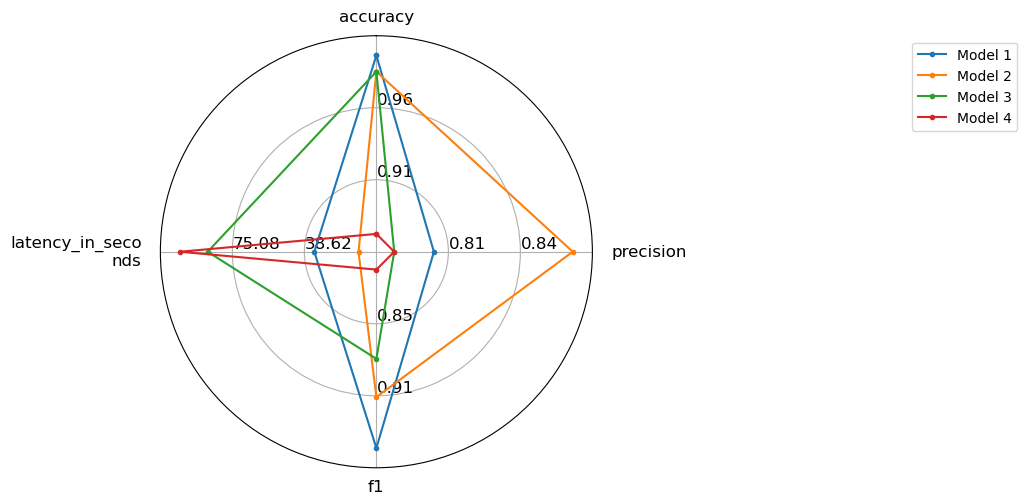

In [26]:
from evaluate.visualization import radar_plot

data = [   
    {"accuracy": 0.99, "precision": 0.8, "f1": 0.95, "latency_in_seconds": 33.6},
    {"accuracy": 0.98, "precision": 0.87, "f1": 0.91, "latency_in_seconds": 11.2},
    {"accuracy": 0.98, "precision": 0.78, "f1": 0.88, "latency_in_seconds": 87.6}, 
    {"accuracy": 0.88, "precision": 0.78, "f1": 0.81, "latency_in_seconds": 101.6}
]
model_names = ["Model 1", "Model 2", "Model 3", "Model 4"]
plot = radar_plot(data=data, model_names=model_names)
plot.show()

# 9. EvaluationSuite : Evaluation on Multiple Tasks.

In [ ]:
# Custom tasks.
from evaluate.evaluation_suite import SubTask

class Suite(evaluate.EvaluationSuite):
    def __init__(self, name):
        super().__init__(name)

        self.suite = [
            SubTask(
                task_type="text-classification",
                data="imdb",
                split="test[:1]",
                args_for_task={
                    "metric": "accuracy",
                    "input_column": "text",
                    "label_column": "label",
                    "label_mapping": {
                        "LABEL_0": 0.0,
                        "LABEL_1": 1.0
                    }
                }
            ),
            SubTask(
                task_type="text-classification",
                data="sst2",
                split="test[:1]",
                args_for_task={
                    "metric": "accuracy",
                    "input_column": "sentence",
                    "label_column": "label",
                    "label_mapping": {
                        "LABEL_0": 0.0,
                        "LABEL_1": 1.0
                    }
                }
            )
        ]

In [ ]:
# Or load from hub.
from evaluate import EvaluationSuite
suite   = EvaluationSuite.load('mathemakitten/sentiment-evaluation-suite')
results = suite.run("huggingface/prunebert-base-uncased-6-finepruned-w-distil-mnli")